The most fundamental question we can ask about a robot is, "Where is it?"
The answer to this question is the robot's Configuration.

The Configuration is a vector of numbers that fully describes the position of the robot.

Robots are composed of rigid links connected by joints. The joints can be actuated by motors to change the configuration of the robot.

![Example of links and joints](Joints-and-Links-of-Robot.png)


The configuration space of a robot is the set of all possible configurations of the robot. Configuration space is also known as C-space, or C<sub>space</sub>.

The dimension of the configuration space is the number of degrees of freedom of the robot (DOF). In other words the number of independent parameters required to fully specify the configuration of the robot.

For example, a robot with 2 revolute joints has a configuration space of 2 dimensions which can described by the angles of the 2 joints.

We can visualize the angle of joint 2 as a point in a circle and the angle of joint 1 as a point on another circle.

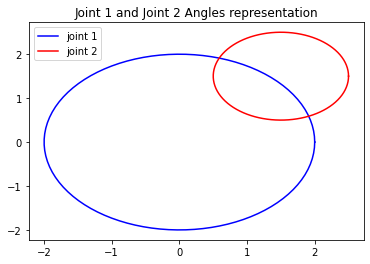

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# joint 1
r1 = 2
x1 = 0
y1 = 0

# joint 2
r2 = 1
x2 = 1.5
y2 = 1.5


# plot joint 1 possible angles
theta = np.linspace(0, 2*np.pi, 100)
x = r1*np.cos(theta) + x1
y = r1*np.sin(theta) + y1
plt.plot(x, y, 'b')

# plot joint 2 possible angles around a point in joint 1
theta = np.linspace(0, 2*np.pi, 100)
x = r2*np.cos(theta) + x2
y = r2*np.sin(theta) + y2
plt.plot(x, y, 'r')

plt.legend(['joint 1', 'joint 2'])
plt.title('Joint 1 and Joint 2 Angles representation')
plt.show()


To visualize the full c-space, lets rotate the circle of joint 1 to be perpendicular to the circle of joint 2.

At each angle of joint 1, we can draw the circle of joint 2, we can repeat this for each angle of joint 1.

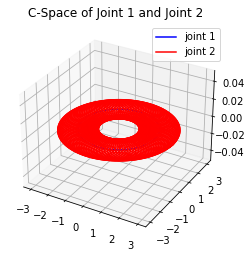

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot circle 1
theta = np.linspace(0, 2*np.pi, 100)
x = r1*np.cos(theta) + x1
y = r1*np.sin(theta) + y1
z = np.zeros(100)
ax.plot(x, y, z, 'b')

# at each point of joint 1, plot a circle of joint 2
for xi, yi, zi in zip(x, y, z):
    theta = np.linspace(0, 2*np.pi, 100)
    x = r2*np.cos(theta) + xi
    y = r2*np.sin(theta) + yi
    z = np.ones(100)*zi
    ax.plot(x, y, z, 'r')

plt.legend(['joint 1', 'joint 2'])
plt.title('C-Space of Joint 1 and Joint 2')
plt.show()


Therefore the configuration space of a 2 DOF robot is a 2D torus.

For every point on the torus, there is a unique configuration of the robot and for every configuration of the robot, there is a unique point on the torus.

As we mentioned before, the dimension of the configuration space is the number of degrees of freedom of the robot.

Since the robot consists of rigid bodies the number of degrees of freedom of a robot depends on the number of degrees of freedom of the rigid body.

To determine the number of degrees of freedom of a rigid body, we can follow these steps:

1. Choose a point on the rigid body.

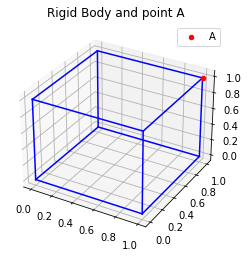

In [113]:
def draw_square(ax):
    for i in range(4):
        ax.plot(cube[[i, (i+1)%4], 0],
            cube[[i, (i+1)%4], 1],
            cube[[i, (i+1)%4], 2], 'b')
        ax.plot(cube[[i+4, (i+1)%4+4], 0],
            cube[[i+4, (i+1)%4+4], 1],
            cube[[i+4, (i+1)%4+4], 2], 'b')
        ax.plot(cube[[i, i+4], 0],
            cube[[i, i+4], 1],
            cube[[i, i+4], 2], 'b')
# Draw a rigid body "Cube" and a point A on it
# Cube
cube = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [1, 1, 0],
                    [1, 0, 0],
                    [0, 0, 1],
                    [0, 1, 1],
                    [1, 1, 1],
                    [1, 0, 1]])
# point A
A = np.array([1, 1, 1])

# plot cube full lines
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
draw_square(ax)
# plot point A
ax.scatter(A[0], A[1], A[2], c='r', marker='o', label='A')
plt.title('Rigid Body and point A')
plt.legend()
plt.show()


The x, y, and z coordinates of this point are 3 numbers.

2. Choose a second point on the rigid body, but because this is a rigid body, the distance between the two points must be constant. 

Therefore, the second point can only move on a sphere of radius r around the first point.

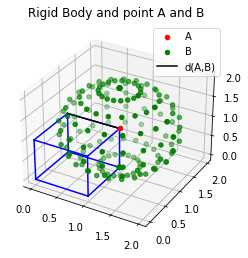

In [114]:
# Representation of a sphere and a point A and B on it
# Cube
cube = cube
# point A
A = np.array([1, 1, 1])
# point B
B = np.array([0, 1, 1])
# sphere center at point A
# radius is the distance between point A and B
r = 1
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = r*np.cos(u)*np.sin(v) + A[0]
y = r*np.sin(u)*np.sin(v) + A[1]
z = r*np.cos(v) + A[2]

# plot cube full lines
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
draw_square(ax)
# plot point A
ax.scatter(A[0], A[1], A[2], c='r', marker='o', label='A')
# plot point B
ax.scatter(x, y, z, c='g', marker='o', label='B')
# plot line between A and B
ax.plot([A[0], B[0]], [A[1], B[1]], [A[2], B[2]], 'black', label='d(A,B)') 

plt.title('Rigid Body and point A and B')
plt.legend()
plt.show()


3. Choose a third point on the rigid body.

Now that we fixed point 1 and point 2, there are two constraints on the third point.

It has to be at the circle at the intersection of the spheres centered at point 1 and point 2. So we need one more number to specify the location of the third point on the circle.

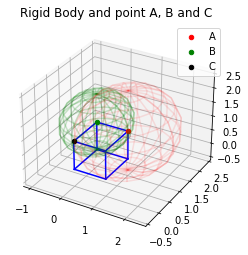

In [121]:
def draw_shpere(A, r1, ax, u, v, color="r", alpha=0.1):
    x = r1*np.cos(u)*np.sin(v) + A[0]
    y = r1*np.sin(u)*np.sin(v) + A[1]
    z = r1*np.cos(v) + A[2]
    ax.plot_wireframe(x, y, z, color=color, alpha=alpha)

# point A
A = np.array([1, 1, 1])
# point B
B = np.array([0, 1, 1])
# point C
C = np.array([0, 0, 1])
# r1 is the distance between point A and C
r1 =  np.linalg.norm(A-C)
# r2 is the distance between point B and C
r2 =  np.linalg.norm(B-C)

# plot cube full lines
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
draw_square(ax)

# plot point A
ax.scatter(A[0], A[1], A[2], c='r', marker='o', label='A')
# plot point B
ax.scatter(B[0], B[1], B[2], c='g', marker='o', label='B')
# plot point C
ax.scatter(C[0], C[1], C[2], c='black', marker='o', label='C')

# draw two spheres
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
draw_shpere(A, r1, ax, u, v)
draw_shpere(B, r2, ax, u, v, color="g", alpha=0.2)
plt.title('Rigid Body and point A, B and C')
plt.legend()
plt.show()


So we need only one number to specify the location of the third point on the circle.

Once we have fxed the locations of all three points, provided that they are not collinear (on the same line), the orientation of the rigid body is fixed.

Therefore, the number of degrees of freedom of a rigid body is 6.
- 3 for the position of the first point
- 2 for the position of the second point
- 1 for the position of the third point

Lets count for each point the number of coordinates, the number of constraints, and the number of real free in choosing the location of the point.

| Point | Coordinates | Constraints | Free Parameters |
| --- | --- | --- | --- |
| A | 3 | 0 | 3 |
| B | 3 | 1 | 2 |
| C | 3 | 2 | 1 |
| D, etc. | 3 | 3 | 0 |
| Total ||| 6 |


Thus a rigid body in space has six total degrees of freedom, three for the position (x, y, z) of the center of mass and three for the orientation (pitch roll yaw) of the body.

We could use the same method to learn that a rigid body in 2D has 3 degrees of freedom, two which is linear (position) and one which is an angle (orientation).


Here is a general rule to summarize the number of degrees of freedom, which hold for any system not just rigid bodies.

The dimension of the configuration space of a system is equal to the sum of degrees of freedom of points minus the number of independent constraints acting on those points.

dof = sum(freedom of points) - number of independent constraints

Since the robot consists of rigid bodies, the number of degrees of freedom of the robot depends on the sum of degrees of freedom of the rigid bodies minus the number of independent constraints acting on those rigid bodies.

dof = sum(freedom of rigid bodies) - number of independent constraints